# P-213 - Apple stock Forecast 



Business Objective:
Predict the apple stock market price for next 30 days. 
There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock. 


In [100]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Reading given data set
apple_stk=pd.read_csv("AAPL.csv")

In [102]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [103]:
apple_stk.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


 We can observe that Open, high, low, Close are having mean , minimum, maximum, standard deviation, median in similar range

In [104]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


We can see the data type for date is object and opne, hign, low, close are float, volume is int

In [105]:
apple_stk.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We have verified that there are no null values in the data set

In [106]:
apple_stk.duplicated().sum()

0

We have verified that there are no duplicate values in the data set

# Line plots of Close, Low, High, Open

<AxesSubplot:>

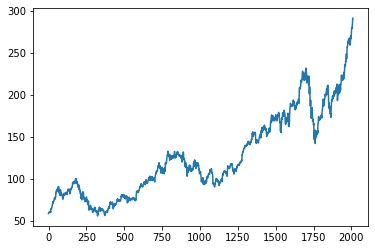

In [107]:
apple_stk.Close.plot()


<AxesSubplot:>

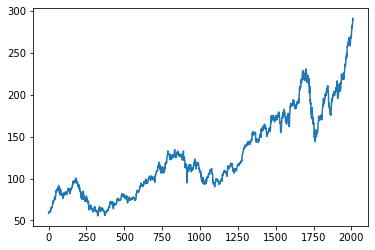

In [108]:
apple_stk.Open.plot()

<AxesSubplot:>

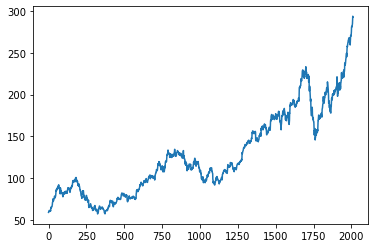

In [109]:
apple_stk.High.plot()

<AxesSubplot:>

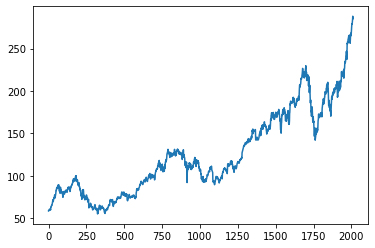

In [110]:
apple_stk.Low.plot()

<AxesSubplot:>

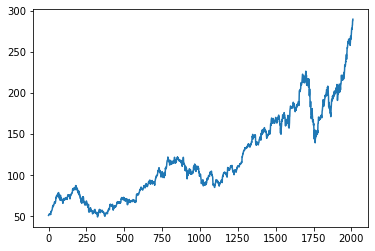

In [111]:
apple_stk['Adj Close'].plot()

In all above plots we can observe upward exponential trend with multiplicative seasonality

Considering Close value for future prediction

<AxesSubplot:>

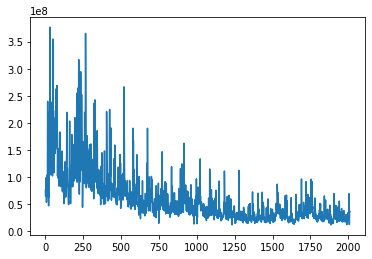

In [112]:
apple_stk['Volume'].plot()

In above volume plot we can observe downward trend

<AxesSubplot:>

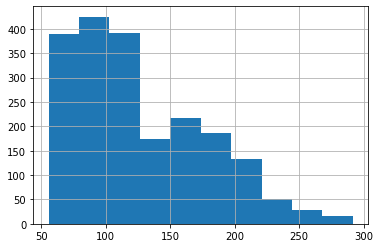

In [113]:
apple_stk.Close.hist()

In above histogram, we can see more observations are between 50 to 125 range, data is right skewed and skewness is positive

<AxesSubplot:ylabel='Density'>

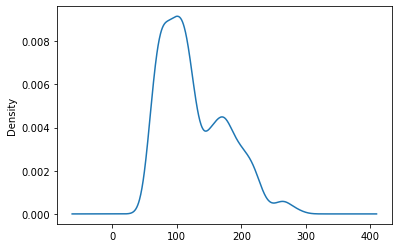

In [114]:
apple_stk.Close.plot(kind='kde')

In [115]:
# converting Date column data type to datetime
apple_stk['Date']=pd.to_datetime(apple_stk['Date'])

In [116]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [117]:
apple_stk.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,60724300


In [118]:
##Extracting Day, month, year from Date column 
apple_stk["Month"] = apple_stk.Date.dt.strftime("%b") # month extraction
apple_stk["Year"] = apple_stk.Date.dt.strftime("%Y") # year extraction
apple_stk["Day"] = apple_stk.Date.dt.strftime("%d") # Day extraction

In [119]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,Jan,2012,03
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,Jan,2012,04
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,Jan,2012,05
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,Jan,2012,06
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,Jan,2012,09
...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,Dec,2019,23
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,Dec,2019,24
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,Dec,2019,26
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,Dec,2019,27


In [120]:
##Extracting week, quarter from Date column 
apple_stk['Week'] = apple_stk['Date'].dt.isocalendar().week  # week extraction
apple_stk['Quarter'] = apple_stk['Date'].dt.quarter          # quarter extraction
apple_stk['Quarter_Info'] = apple_stk['Date'].dt.to_period('Q') # quarter with yr extraction

In [121]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2011 non-null   datetime64[ns]
 1   Open          2011 non-null   float64       
 2   High          2011 non-null   float64       
 3   Low           2011 non-null   float64       
 4   Close         2011 non-null   float64       
 5   Adj Close     2011 non-null   float64       
 6   Volume        2011 non-null   int64         
 7   Month         2011 non-null   object        
 8   Year          2011 non-null   object        
 9   Day           2011 non-null   object        
 10  Week          2011 non-null   UInt32        
 11  Quarter       2011 non-null   int64         
 12  Quarter_Info  2011 non-null   period[Q-DEC] 
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(2), object(3), period[Q-DEC](1)
memory usage: 198.5+ KB


In [122]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,Week,Quarter,Quarter_Info
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,Jan,2012,03,1,1,2012Q1
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,Jan,2012,04,1,1,2012Q1
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,Jan,2012,05,1,1,2012Q1
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,Jan,2012,06,1,1,2012Q1
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,Jan,2012,09,2,1,2012Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,Dec,2019,23,52,4,2019Q4
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,Dec,2019,24,52,4,2019Q4
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,Dec,2019,26,52,4,2019Q4
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,Dec,2019,27,52,4,2019Q4


In [123]:
apple_stk['Quarter_Info']=apple_stk['Quarter_Info'].astype('object')

In [124]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2011 non-null   datetime64[ns]
 1   Open          2011 non-null   float64       
 2   High          2011 non-null   float64       
 3   Low           2011 non-null   float64       
 4   Close         2011 non-null   float64       
 5   Adj Close     2011 non-null   float64       
 6   Volume        2011 non-null   int64         
 7   Month         2011 non-null   object        
 8   Year          2011 non-null   object        
 9   Day           2011 non-null   object        
 10  Week          2011 non-null   UInt32        
 11  Quarter       2011 non-null   int64         
 12  Quarter_Info  2011 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 198.5+ KB


In [125]:
##Verying Data continuity

In [126]:
# Checking the count of data records as per year
apple_stk.groupby(['Year'])['Year'].value_counts()

Year  Year
2012  2012    250
2013  2013    252
2014  2014    252
2015  2015    252
2016  2016    252
2017  2017    251
2018  2018    251
2019  2019    251
Name: Year, dtype: int64

In [127]:
pd.options.display.max_rows=100

In [128]:
# Checking the count of data records as per year and month
apple_stk.groupby(['Year'])['Month'].value_counts()

Year  Month
2012  Aug      23
      Mar      22
      May      22
      Jul      21
      Jun      21
      Nov      21
      Oct      21
      Apr      20
      Dec      20
      Feb      20
      Jan      20
      Sep      19
2013  Oct      23
      Apr      22
      Aug      22
      Jul      22
      May      22
      Dec      21
      Jan      21
      Jun      20
      Mar      20
      Nov      20
      Sep      20
      Feb      19
2014  Oct      23
      Dec      22
      Jul      22
      Apr      21
      Aug      21
      Jan      21
      Jun      21
      Mar      21
      May      21
      Sep      21
      Feb      19
      Nov      19
2015  Dec      22
      Jul      22
      Jun      22
      Mar      22
      Oct      22
      Apr      21
      Aug      21
      Sep      21
      Jan      20
      May      20
      Nov      20
      Feb      19
2016  Aug      23
      Jun      22
      Mar      22
      Apr      21
      Dec      21
      May      21
      Nov      2

In [129]:
# Checking the count of data records as per year and month, finding minimum day of the month
apple_stk.groupby(['Year','Month'])['Day'].min()

Year  Month
2012  Apr      02
      Aug      01
      Dec      03
      Feb      01
      Jan      03
      Jul      02
      Jun      01
      Mar      01
      May      01
      Nov      01
      Oct      01
      Sep      04
2013  Apr      01
      Aug      01
      Dec      02
      Feb      01
      Jan      02
      Jul      01
      Jun      03
      Mar      01
      May      01
      Nov      01
      Oct      01
      Sep      03
2014  Apr      01
      Aug      01
      Dec      01
      Feb      03
      Jan      02
      Jul      01
      Jun      02
      Mar      03
      May      01
      Nov      03
      Oct      01
      Sep      02
2015  Apr      01
      Aug      03
      Dec      01
      Feb      02
      Jan      02
      Jul      01
      Jun      01
      Mar      02
      May      01
      Nov      02
      Oct      01
      Sep      01
2016  Apr      01
      Aug      01
      Dec      01
      Feb      01
      Jan      04
      Jul      01
      Jun      0

In [130]:
# Checking the count of data records as per year and month, finding minimum day of the month
apple_stk.groupby(['Year','Month'])['Day'].max()

Year  Month
2012  Apr      30
      Aug      31
      Dec      31
      Feb      29
      Jan      31
      Jul      31
      Jun      29
      Mar      30
      May      31
      Nov      30
      Oct      31
      Sep      28
2013  Apr      30
      Aug      30
      Dec      31
      Feb      28
      Jan      31
      Jul      31
      Jun      28
      Mar      28
      May      31
      Nov      29
      Oct      31
      Sep      30
2014  Apr      30
      Aug      29
      Dec      31
      Feb      28
      Jan      31
      Jul      31
      Jun      30
      Mar      31
      May      30
      Nov      28
      Oct      31
      Sep      30
2015  Apr      30
      Aug      31
      Dec      31
      Feb      27
      Jan      30
      Jul      31
      Jun      30
      Mar      31
      May      29
      Nov      30
      Oct      30
      Sep      30
2016  Apr      29
      Aug      31
      Dec      30
      Feb      29
      Jan      29
      Jul      29
      Jun      3

We verified that data is continuous, there is no missing data other than weekends & holidays.

<AxesSubplot:xlabel='Year', ylabel='Close'>

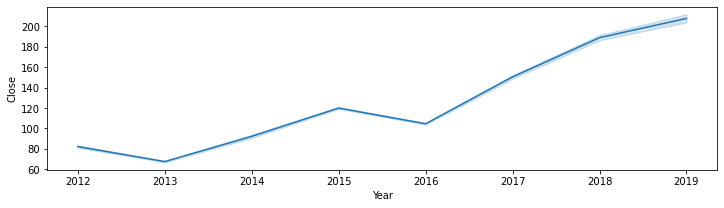

In [131]:
## Line plot of Close value , yearly wise
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Close",data=apple_stk)

In above line plot of Year , we can observe that apple stock has decreasing trend from 2012 to 2013 & 2015 to 2016 and it has increasing trend from 2013 to 2015 & 2016 to 2019. Overall we can see upward trend.

<AxesSubplot:xlabel='Month', ylabel='Close'>

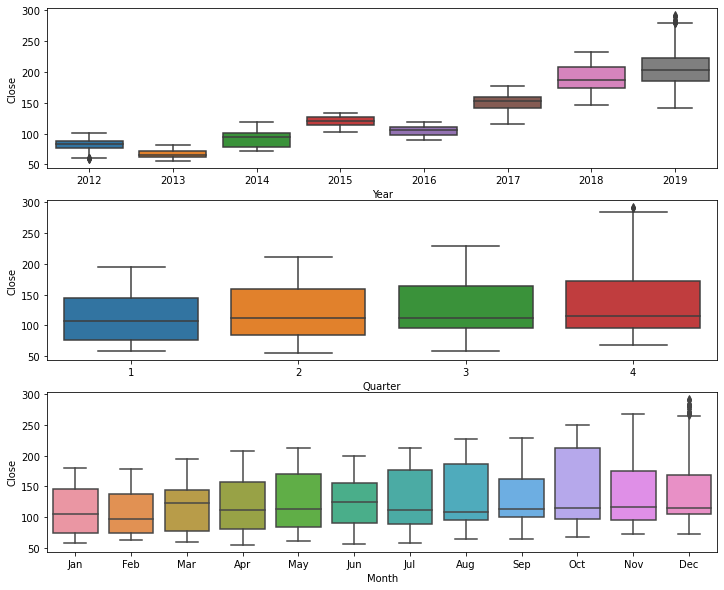

In [132]:
# Boxplot for year and Month
plt.figure(figsize=(12,10))
plt.subplot(311)
sns.boxplot(x="Year",y="Close",data=apple_stk)
plt.subplot(312)
sns.boxplot(x="Quarter",y="Close",data=apple_stk)
plt.subplot(313)
sns.boxplot(x="Month",y="Close",data=apple_stk)

Observations:
    
    we can observe that apple stock has decreasing trend from 2012 to 2013 & 2015 to 2016 and 
    it has increasing trend from 2013 to 2015 & 2016 to 2019. Overall we can see upward trend.
    We can also observe outliers in 2012, 2019.
    
    We can observe that median is in same range in Quarterly boxplots, quarter 4 has long whisker.
    We can also observe outliers in quarter 4.
    
    We can observe that median is in same range in monthly boxplots, except March and June are having slightly higher median 
    and IQR range is high for October. We can also observe outliers in December month.
    
    

In [133]:
quar=apple_stk.groupby(['Year','Quarter_Info'])['Close'].mean()
print(quar)

Year  Quarter_Info
2012  2012Q1           71.954263
      2012Q2           83.012879
      2012Q3           91.506213
      2012Q4           82.537696
2013  2013Q1           66.596333
      2013Q2           61.534710
      2013Q3           66.320781
      2013Q4           75.567567
2014  2014Q1           76.086370
      2014Q2           85.117529
      2014Q3           98.163437
      2014Q4          108.821250
2015  2015Q1          120.777049
      2015Q2          127.938095
      2015Q3          117.303438
      2015Q4          114.299375
2016  2016Q1           99.655082
      2016Q2           99.401250
      2016Q3          105.866094
      2016Q4          113.399048
2017  2017Q1          131.712580
      2017Q2          147.875396
      2017Q3          155.169048
      2017Q4          167.148254
2018  2018Q1          172.191312
      2018Q2          181.396563
      2018Q3          208.300001
      2018Q4          193.912064
2019  2019Q1          169.663770
      2019Q2          19

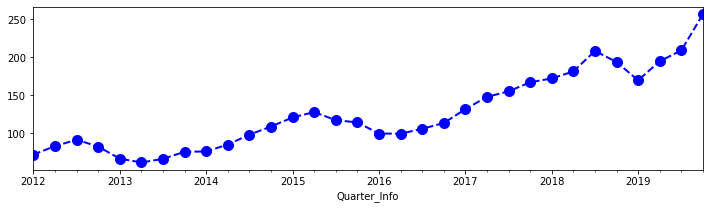

In [134]:
quar=apple_stk.groupby(['Quarter_Info'])['Close'].mean()
plt.figure(figsize=(12,3))
#plt.xticks(x, labels, rotation='vertical')
quar.plot(color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.show()
#sns.lineplot(x="Quarter_Info", y="Close",data=apple_stk)


In [135]:
quar1=apple_stk.groupby(['Quarter','Year'])['Close'].mean()
quar1

Quarter  Year
1        2012     71.954263
         2013     66.596333
         2014     76.086370
         2015    120.777049
         2016     99.655082
         2017    131.712580
         2018    172.191312
         2019    169.663770
2        2012     83.012879
         2013     61.534710
         2014     85.117529
         2015    127.938095
         2016     99.401250
         2017    147.875396
         2018    181.396563
         2019    194.892699
3        2012     91.506213
         2013     66.320781
         2014     98.163437
         2015    117.303438
         2016    105.866094
         2017    155.169048
         2018    208.300001
         2019    209.120781
4        2012     82.537696
         2013     75.567567
         2014    108.821250
         2015    114.299375
         2016    113.399048
         2017    167.148254
         2018    193.912064
         2019    256.752222
Name: Close, dtype: float64

<AxesSubplot:xlabel='Quarter', ylabel='Close'>

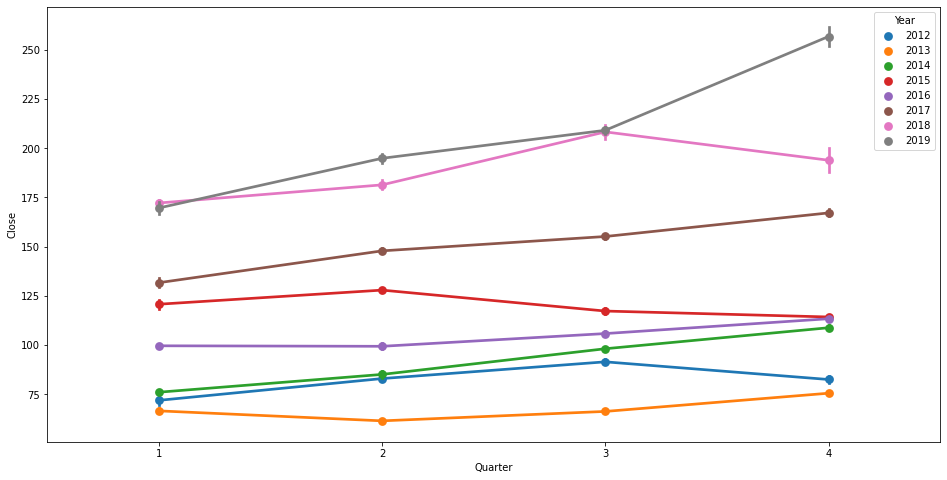

In [136]:
plt.figure(figsize=(16,8))
sns.pointplot(data=apple_stk, x='Quarter',y='Close',hue='Year')
#sns.barplot(data=apple_stk, x='Quarter_Info',y='Close',hue='Year')

In above plot we can see line plots for each year and quarter

<AxesSubplot:xlabel='Quarter_Info', ylabel='Close'>

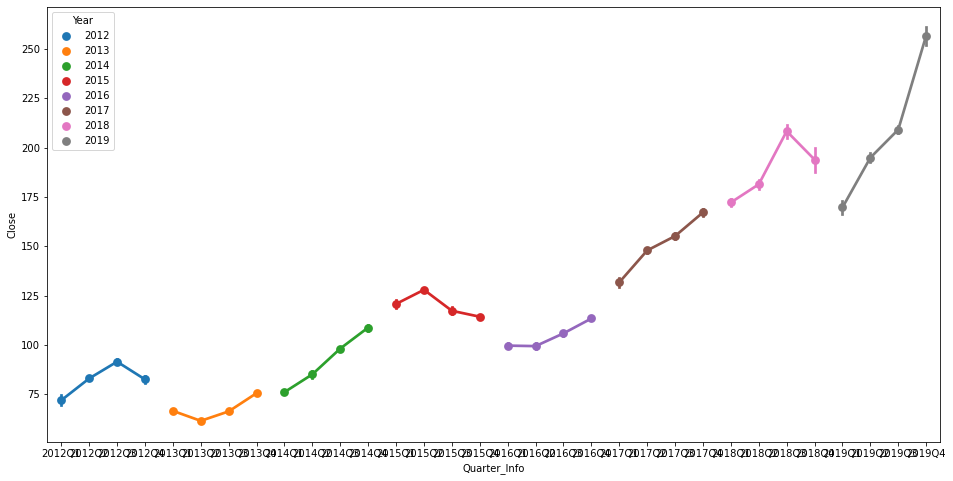

In [137]:
plt.figure(figsize=(16,8))
sns.pointplot(data=apple_stk, x='Quarter_Info',y='Close',hue='Year')

In above plot, we can observe 2013 & 2016 are having same pattern, 2014 & 2017 having same pattern, 2012 & 2018 are having same patteren.

<AxesSubplot:xlabel='Year', ylabel='Close'>

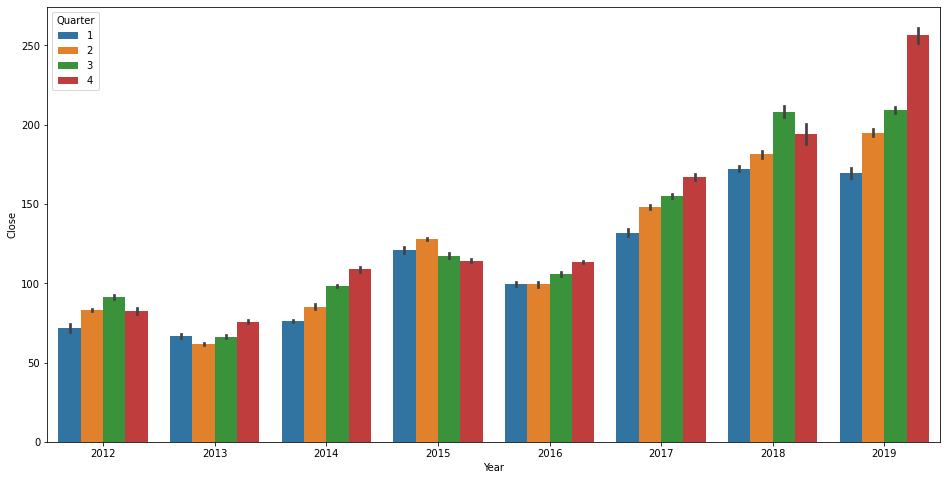

In [138]:
plt.figure(figsize=(16,8))
sns.barplot(data=apple_stk, x='Year',y='Close',hue='Quarter')
#sns.barplot(data=apple_stk, x='Quarter_Info',y='Close',hue='Year')

In above plot, we can observe 2013 & 2016 are having same pattern, 
2014 & 2017 having same pattern,
2012 & 2018 are having same patteren.

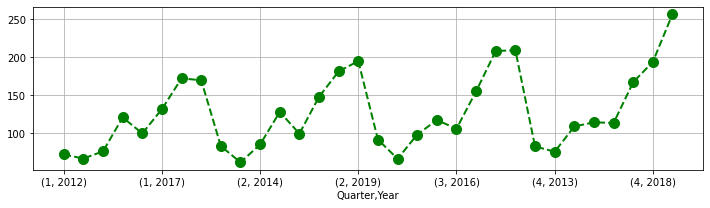

In [139]:
quar1=apple_stk.groupby(['Quarter','Year'])['Close'].mean()
quar1
plt.figure(figsize=(12,3))
quar1.plot(color='green', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.grid()
plt.show()

In above quarter plots, we can observe quarter 1, 2, 3 are having similar patterns over years and quarter 4 pattern is sightly changed with other quarters

In [140]:
quar1=apple_stk.groupby(['Quarter','Year'])['Close'].mean()
quar1

Quarter  Year
1        2012     71.954263
         2013     66.596333
         2014     76.086370
         2015    120.777049
         2016     99.655082
         2017    131.712580
         2018    172.191312
         2019    169.663770
2        2012     83.012879
         2013     61.534710
         2014     85.117529
         2015    127.938095
         2016     99.401250
         2017    147.875396
         2018    181.396563
         2019    194.892699
3        2012     91.506213
         2013     66.320781
         2014     98.163437
         2015    117.303438
         2016    105.866094
         2017    155.169048
         2018    208.300001
         2019    209.120781
4        2012     82.537696
         2013     75.567567
         2014    108.821250
         2015    114.299375
         2016    113.399048
         2017    167.148254
         2018    193.912064
         2019    256.752222
Name: Close, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Close'>

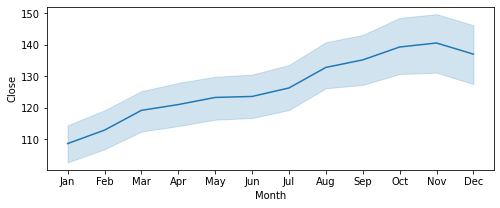

In [141]:
plt.figure(figsize=(8,3))
sns.lineplot(x="Month",y="Close",data=apple_stk)

In above monthly wise plot, we can observe that November month has high close value.
upward exponental trend from Jan to March , July to August, September to October
and downward trend from November to December

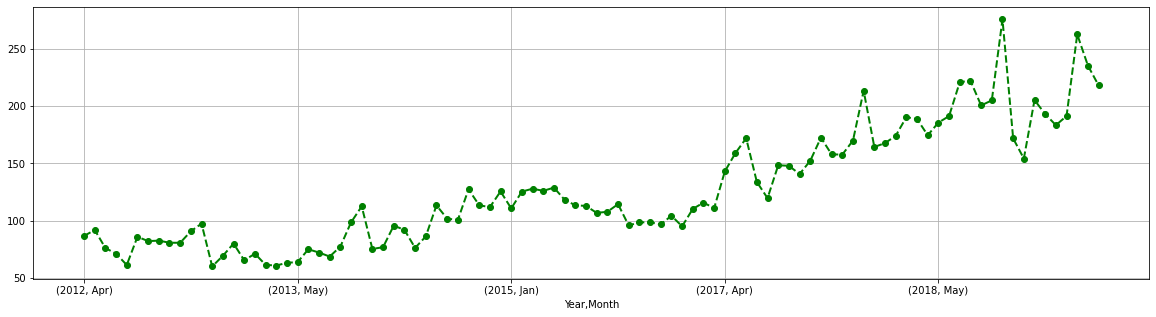

In [142]:
month1=apple_stk.groupby(['Year','Month'])['Close'].mean()
month1
plt.figure(figsize=(20,5))
month1.plot(color='green', marker='o', linestyle='dashed',linewidth=2, markersize=6)
plt.grid()
plt.show()

In above plot we can observe some patterns are repeating like 'W' shape 

<AxesSubplot:xlabel='Week', ylabel='Close'>

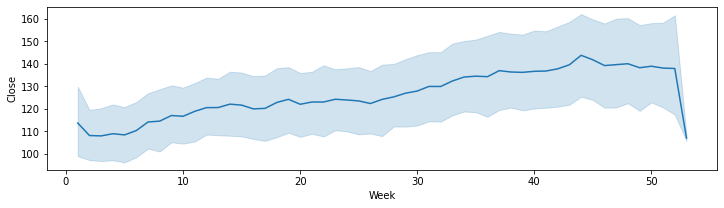

In [143]:
## Line plot weekly wise
plt.figure(figsize=(12,3))
sns.lineplot(x="Week",y="Close",data=apple_stk)

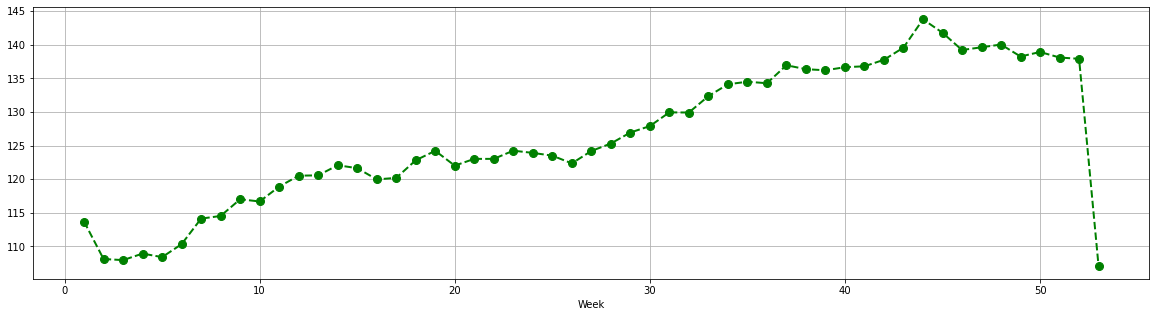

In [144]:
week1=apple_stk.groupby(['Week'])['Close'].mean()
week1
plt.figure(figsize=(20,5))
week1.plot(color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.grid()
plt.show()

In above Weekly plot we can observe highest close value at 44 week and did n't find significant patterns 

In [145]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,Week,Quarter,Quarter_Info
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,Jan,2012,03,1,1,2012Q1
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,Jan,2012,04,1,1,2012Q1
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,Jan,2012,05,1,1,2012Q1
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,Jan,2012,06,1,1,2012Q1
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,Jan,2012,09,2,1,2012Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,Dec,2019,23,52,4,2019Q4
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,Dec,2019,24,52,4,2019Q4
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,Dec,2019,26,52,4,2019Q4
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,Dec,2019,27,52,4,2019Q4


<AxesSubplot:xlabel='Year', ylabel='Volume'>

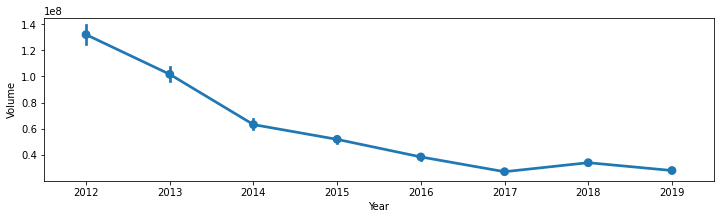

In [146]:
plt.figure(figsize=(12,3))
sns.pointplot(x="Year",y="Volume",data=apple_stk)

In above line plot we can observe decreasing or downward trend in the volume.

<AxesSubplot:xlabel='Month', ylabel='Year'>

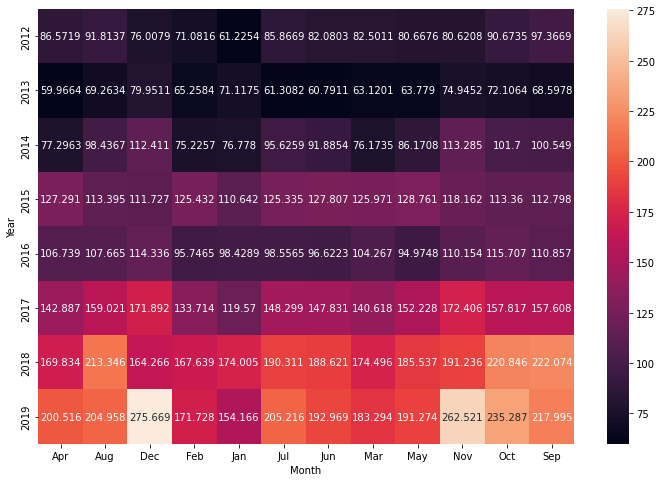

In [147]:
plt.figure(figsize=(12,8))
heatmap_yr_month = pd.pivot_table(data=apple_stk,values="Close",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_yr_month,annot=True,fmt="g") #fmt is format of the grid values

# Lag Plots

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

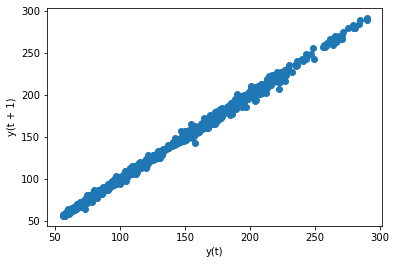

In [148]:
from pandas.plotting import lag_plot
lag_plot(apple_stk['Close'],lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

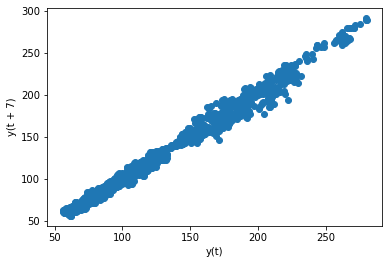

In [149]:
lag_plot(apple_stk['Close'],lag=7)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 15)'>

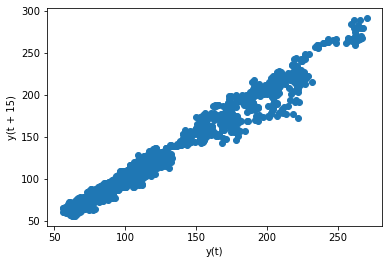

In [150]:
lag_plot(apple_stk['Close'],lag=15)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 30)'>

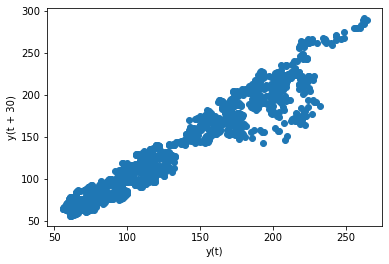

In [151]:
lag_plot(apple_stk['Close'],lag=30)

In above lag plots, we can see strong positive correlation, lag value is increasing speard also increasing.  
lag=1 is having strong correlation.

# Time series decomposition plot

<Figure size 432x288 with 0 Axes>

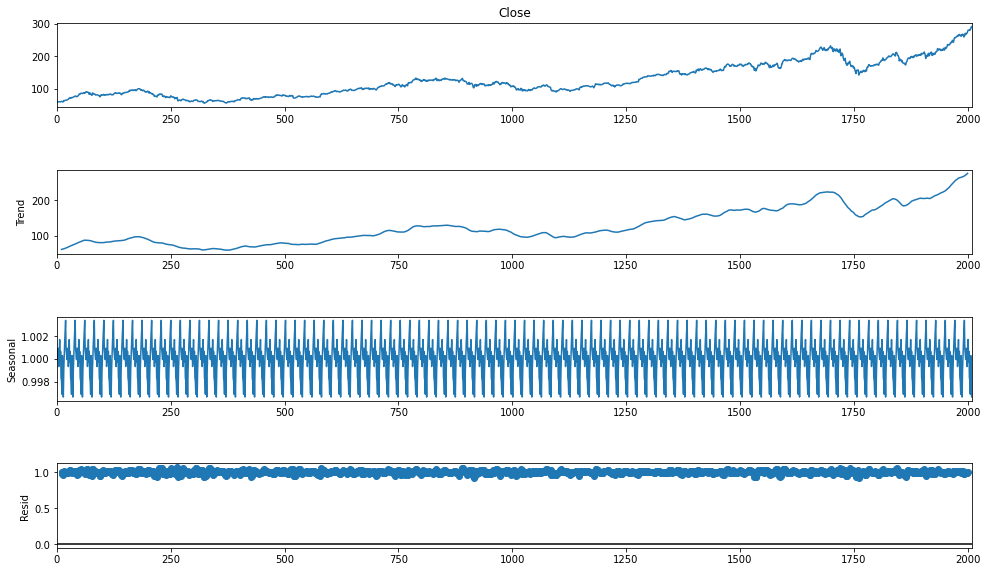

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'], model='multiplicative', period=21)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

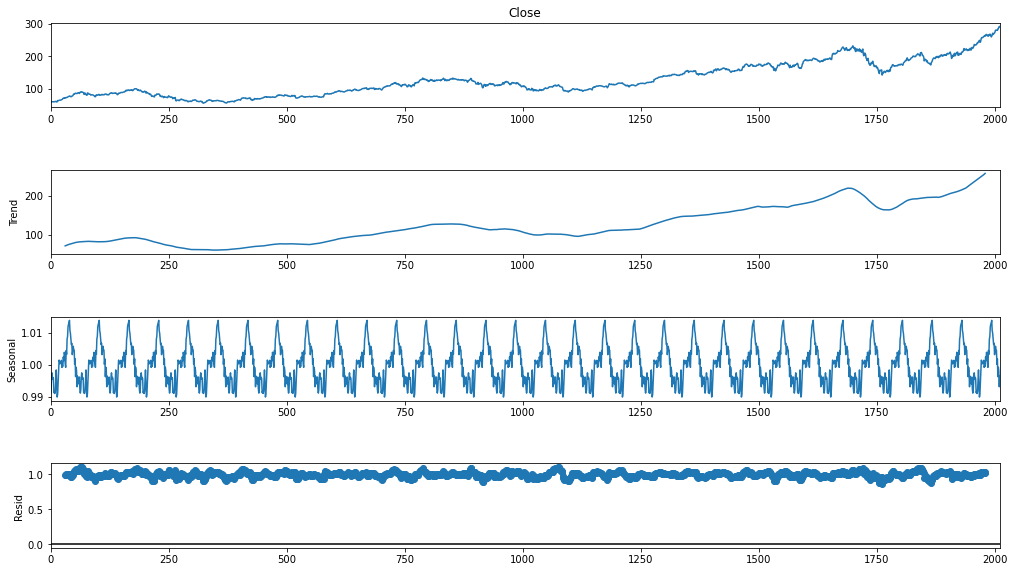

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'], model='multiplicative', period=63)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

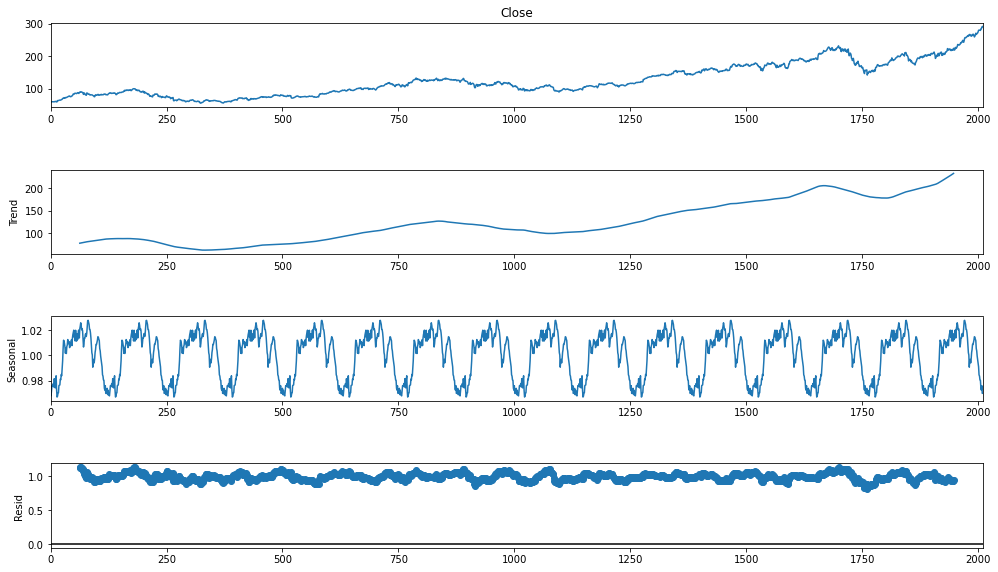

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'], model='multiplicative', period=126)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

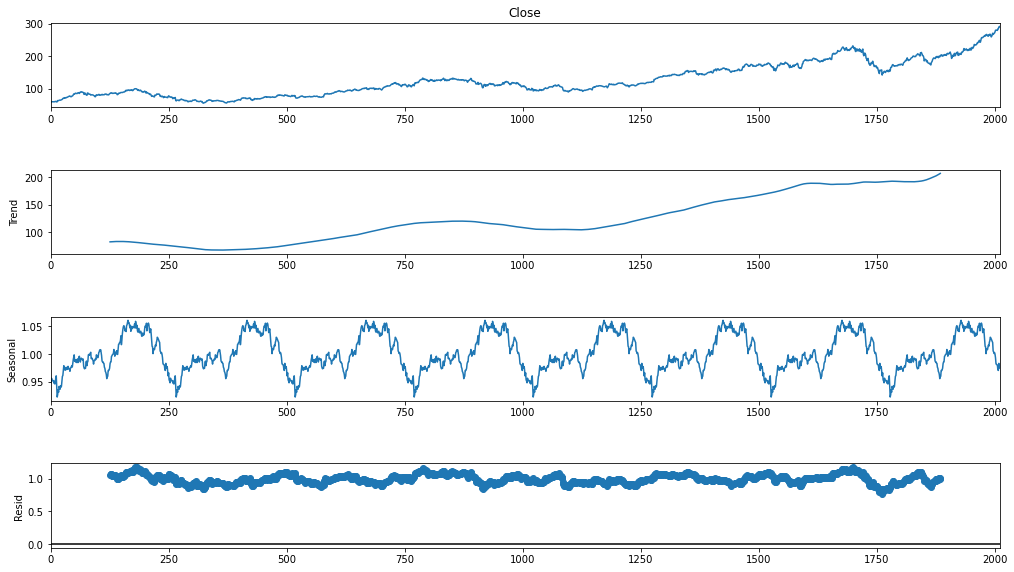

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'], model='multiplicative', period=252)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

We can observe trend and seasonality clearly in above plots. So, we can say the data is non-stationary.

In [156]:
## Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller
adfuller(apple_stk['Close'])

(1.2193701254378042,
 0.996117017803201,
 9,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8633.09680956294)

We can see the probability value is more than 0.05. So we can say it is non-stationary data.

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots

Autocorrelation is the correlation between a time series with a lagged version of itself. 
Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.
The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.
Additionally, you can see a blue area in the ACF and PACF plots. This blue area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

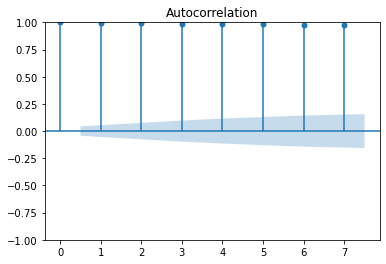

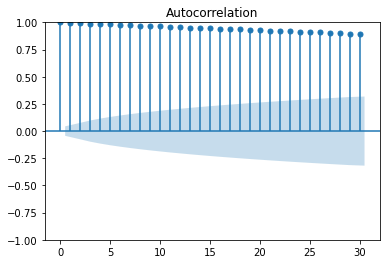

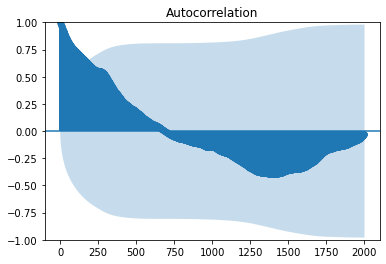

In [157]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close, lags=7)
plot_acf(apple_stk.Close, lags=30)
plot_acf(apple_stk.Close, lags=2000)
plt.show() 

We can see all the lags are beyond the blue color zone, so we can say the data is non-stationary.

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


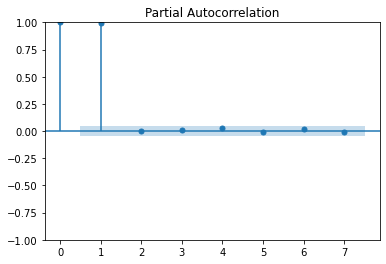

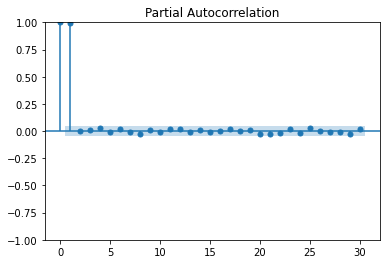

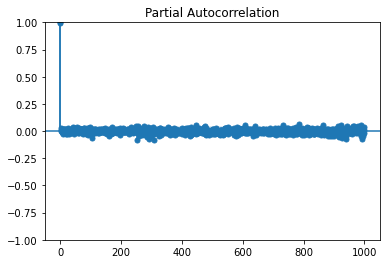

In [158]:
plot_pacf(apple_stk.Close, lags=7)
plot_pacf(apple_stk.Close, lags=30)
plot_pacf(apple_stk.Close, lags=1000)
plt.show() 

We can see only lag1 is significant in above PACF plot, so we can apply AR(1) model for this data.

In [159]:
# Differencing the close value
apple_stk['Close_diff']=apple_stk['Close'].diff()


In [160]:
## Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller
adfuller(apple_stk.Close.diff().dropna())

(-13.625534323873268,
 1.7631231987208899e-25,
 8,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8629.540212595413)

We can see the probability value is less than 0.05. So we can consider data is stationary and can apply ARIMA model

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


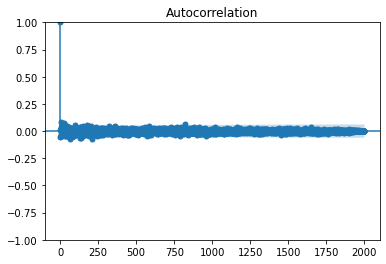

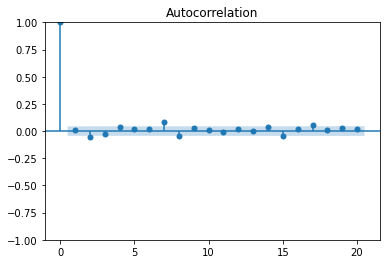

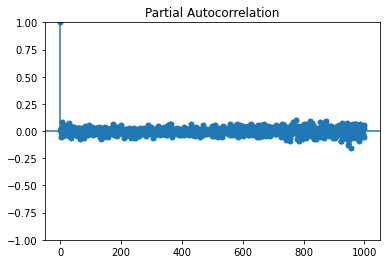

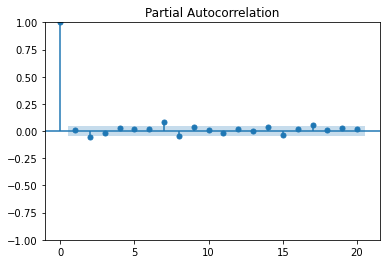

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff(1).dropna(),lags=2000)
plot_acf(apple_stk.Close.diff(1).dropna(),lags=20)
plot_pacf(apple_stk.Close.diff(1).dropna(),lags=1000)
plot_pacf(apple_stk.Close.diff(1).dropna(),lags=20)
plt.show() 

We can observe in above ACF & PACF plots there are no significant lags, so we can try with 0,1,0 ARIMA model

<AxesSubplot:>

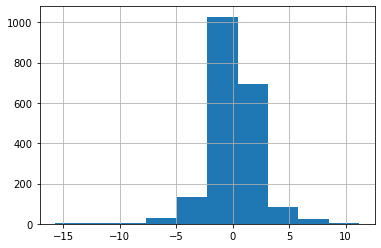

In [162]:
apple_stk.Close_diff.hist()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close_diff', ylabel='Density'>

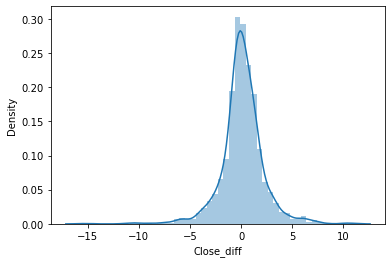

In [163]:
sns.distplot(apple_stk.Close_diff)

In above histogram and density plot, we can see data is left skewed and skewness is negative

In [164]:
apple_stk['Close_diff'].isnull().sum()

1

In [165]:
apple_stk.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,Week,Quarter,Quarter_Info,Close_diff
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,Jan,2012,03,1,1,2012Q1,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,Jan,2012,04,1,1,2012Q1,0.315716
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,Jan,2012,05,1,1,2012Q1,0.655712
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,Jan,2012,06,1,1,2012Q1,0.624286
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,Jan,2012,09,2,1,2012Q1,-0.095714
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100,Jan,2012,10,2,1,2012Q1,0.215713
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200,Jan,2012,11,2,1,2012Q1,-0.098571
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800,Jan,2012,12,2,1,2012Q1,-0.165715
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400,Jan,2012,13,2,1,2012Q1,-0.225712
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,60724300,Jan,2012,17,3,1,2012Q1,0.698571


<Figure size 432x288 with 0 Axes>

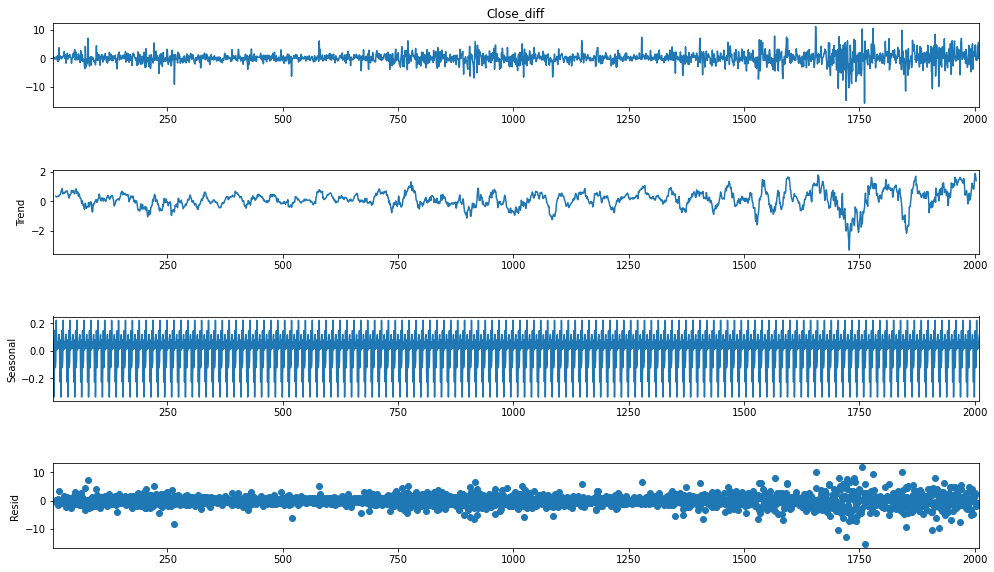

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose((apple_stk.Close_diff[1:]),period=15)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

We can see seasonality clearly in above plot after differencing Close value.

In [167]:
# 2nd Differencing 
apple_stk['Close_diff2']=apple_stk['Close_diff'].diff()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


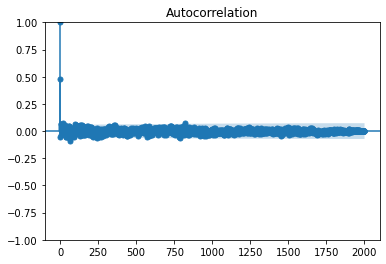

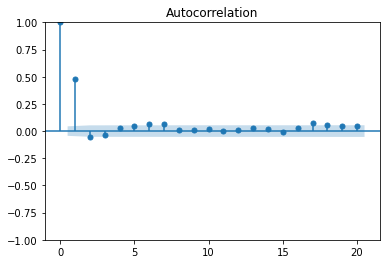

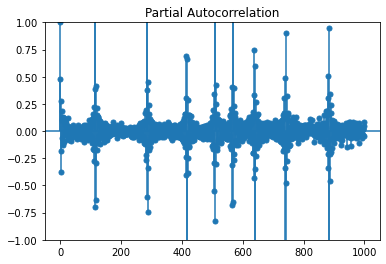

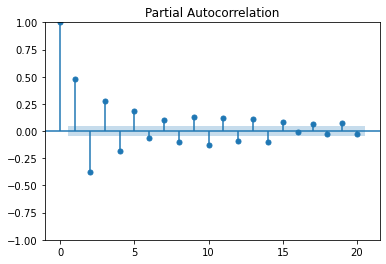

In [168]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff(2).dropna(),lags=2000)
plot_acf(apple_stk.Close.diff(2).dropna(),lags=20)
plot_pacf(apple_stk.Close.diff(2).dropna(),lags=1000)
plot_pacf(apple_stk.Close.diff(2).dropna(),lags=20)
plt.show() 

After 2nd differencing , we can see lag 1 is significan in ACF plot, and many lags are significant in PACF plot.

In [169]:
apple_stk['Close_diff2']

0            NaN
1            NaN
2       0.339996
3      -0.031426
4      -0.720000
          ...   
2006    5.139985
2007   -4.290009
2008    5.370026
2009   -5.750031
2010    1.830017
Name: Close_diff2, Length: 2011, dtype: float64

<AxesSubplot:>

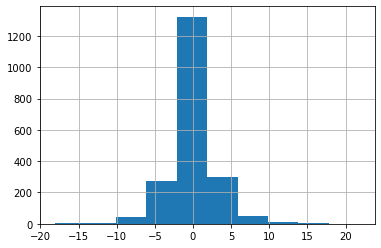

In [170]:
apple_stk['Close_diff2'].hist()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close_diff2', ylabel='Density'>

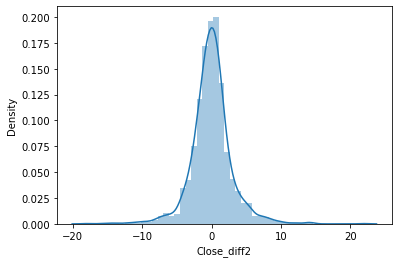

In [171]:
sns.distplot(apple_stk['Close_diff2'])

In above histogram and density plot, we can see data skewness is slightly reduced than the 1st differencing Close value

<Figure size 432x288 with 0 Axes>

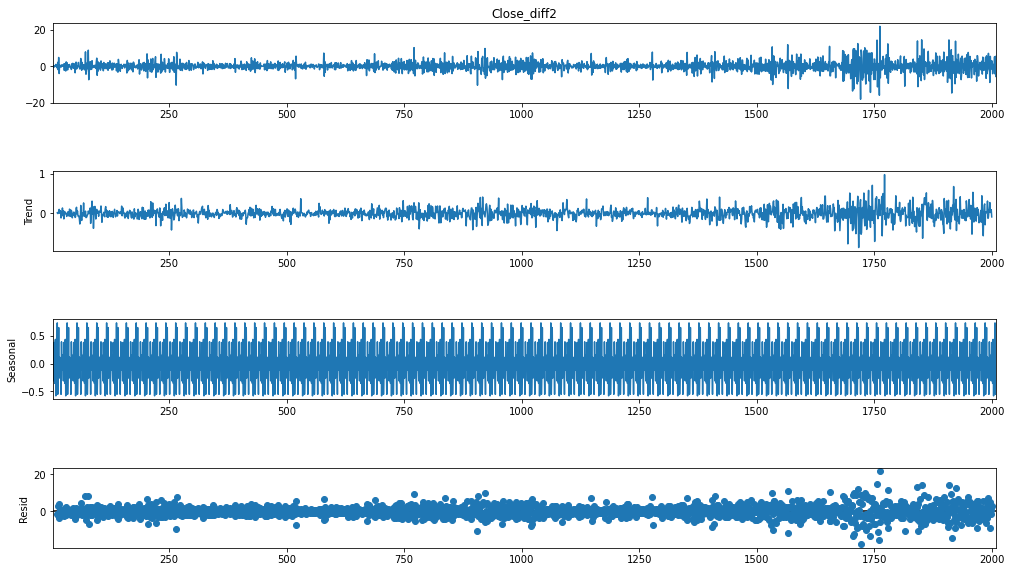

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose((apple_stk.Close_diff2.dropna()),period=21)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

After 2nd differencing of Close value, still we can see seasonality in above plots.

As per above analysis data is having trend and seasonality, so we can apply data driven models like holt, holt winter exponential methods. We can apply ARIMA and Sarima models based on ACF & PACF plots. We can choose best model based on model results and do the forecasting.